In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# Loading and Exploring the Dataset:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
file_path = '/kaggle/input/students-performance-in-exams/StudentsPerformance.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The dataset has been successfully loaded, and the first few rows reveal key details about students' performance in exams, including:

- **gender**: Gender of the student
- **race/ethnicity**: The group the student belongs to
- **parental level of education**: The highest level of education attained by the parents
- **lunch**: Type of lunch the student receives (standard or free/reduced)
- **test preparation course**: Whether the student completed a test preparation course
- **math score**: The student's score in math
- **reading score**: The student's score in reading
- **writing score**: The student's score in writing

In [4]:
print('dataset size:', df.shape)

dataset size: (1000, 8)


In [5]:
# Display the columns in the dataset
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
# Check for missing values in the dataset
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# Check for duplicate values in the dataset
if df.duplicated().sum() == 0:
    print("There's no duplicate value in dataset.")
else:
    print("Total duplicate value in dataset: ", df.duplicated().sum())

There's no duplicate value in dataset.


In [8]:
# Display summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Display the number of unique values in each column of the dataset
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
# Display descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Insights from the dataset:

- **Dataset size**: 1000 rows and 8 columns.
- **Columns**: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score'].
- **Missing values**: No missing values are present in the dataset.
- **Duplicate values**: There are no duplicate records in the dataset.
- **Unique values**:
  - Gender: 2 unique values
  - Race/ethnicity: 5 unique values
  - Parental level of education: 6 unique values
  - Lunch: 2 unique values
  - Test preparation course: 2 unique values
  - Math score: 81 unique values
  - Reading score: 72 unique values
  - Writing score: 77 unique values
- **Descriptive statistics**:
  - Math score: Mean = 66.09, Standard Deviation = 15.16, Minimum = 0, Maximum = 100
  - Reading score: Mean = 69.17, Standard Deviation = 14.60, Minimum = 17, Maximum = 100
  - Writing score: Mean = 68.05, Standard Deviation = 15.20, Minimum = 10, Maximum = 100


# Numerical and Categorical Data Visualization:

In [11]:
# Identifying numerical and non-numerical columns in the dataset

# Numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Non-numerical columns
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the numerical and non-numerical columns
print("Categorical Columns:", numerical_columns)
print("Numerical Columns:", non_numerical_columns)

Categorical Columns: ['math score', 'reading score', 'writing score']
Numerical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


The dataset contains the following columns:

Numerical Columns:
1. **math score**
2. **reading score**
3. **writing score**

Non-Numerical (Categorical) Columns:
1. **gender**
2. **race/ethnicity**
3. **parental level of education**
4. **lunch**
5. **test preparation course**



In [12]:
# Get the unique values for each categorical column
for col in non_numerical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print("\n")  


Column: gender
Unique Values: ['female' 'male']


Column: race/ethnicity
Unique Values: ['group B' 'group C' 'group A' 'group D' 'group E']


Column: parental level of education
Unique Values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Column: lunch
Unique Values: ['standard' 'free/reduced']


Column: test preparation course
Unique Values: ['none' 'completed']




The unique values for each categorical column in the dataset are as follows:

- **gender**: `['female', 'male']`
- **race/ethnicity**: `['group B', 'group C', 'group A', 'group D', 'group E']`
- **parental level of education**: `["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']`
- **lunch**: `['standard', 'free/reduced']`
- **test preparation course**: `['none', 'completed']`



In [13]:
# Function to display histplot and boxplot for numerical columns
def plot_numerical_distribution(column_name):
    plt.figure(figsize=(10, 4))
    
    # Histogram for distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {column_name}')
    
    # Boxplot for distribution
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column_name], color='lightgreen')
    plt.title(f'Boxplot of {column_name}')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

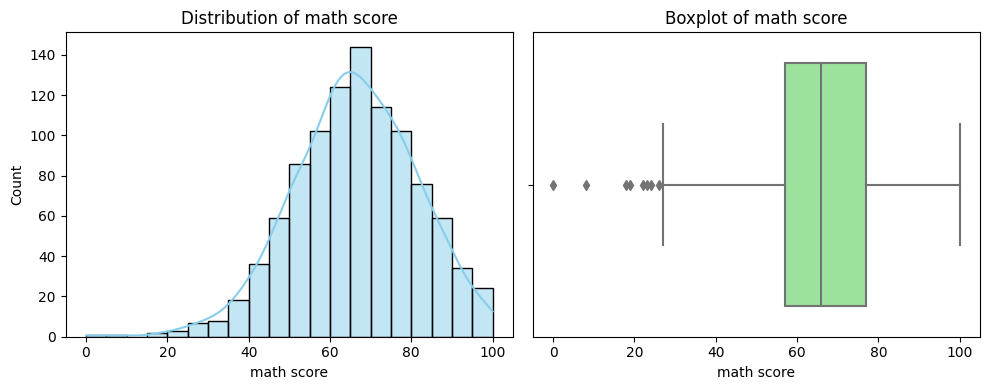

In [14]:
# for the 'math score' column
plot_numerical_distribution('math score')

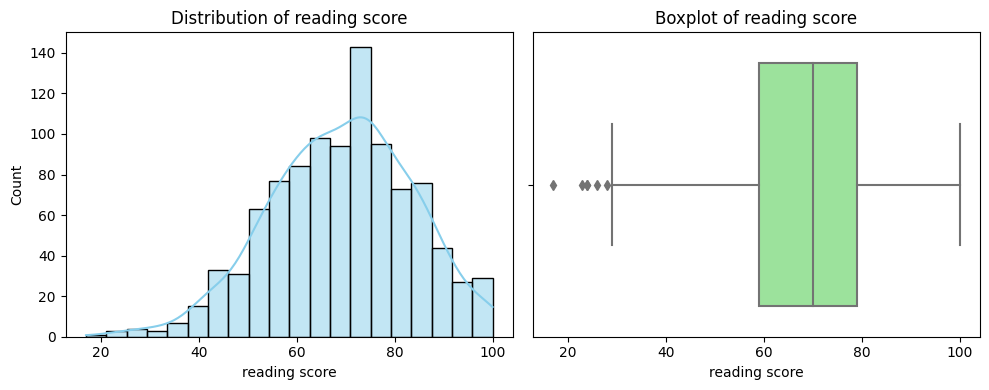

In [15]:
# for the 'reading score' column
plot_numerical_distribution('reading score')

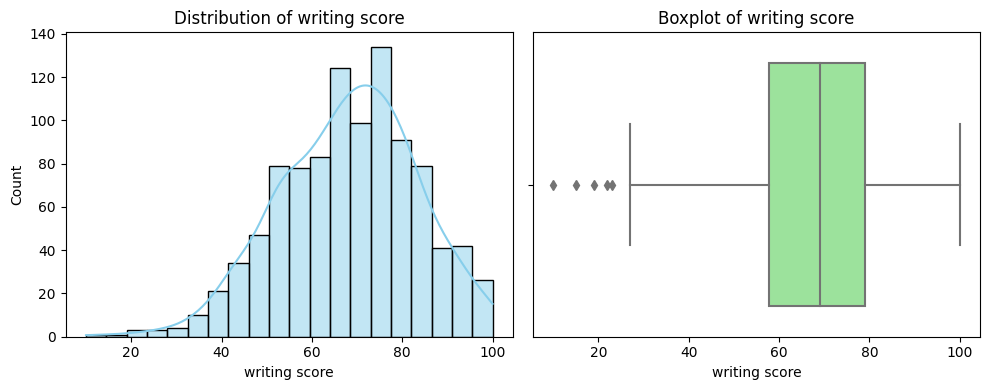

In [16]:
# for the 'writing score' column
plot_numerical_distribution('writing score')

In [17]:
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(column_name):
    plt.figure(figsize=(10, 4))
    
    # Bar Chart for column distribution with column name on the y-axis
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='Set2')  # y-axis instead of x-axis
    plt.title(f'Distribution of {column_name}')
    
    # Add count labels on top of bars
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    # Remove the frame from the barplot
    sns.despine(left=True, bottom=True)
    
    # Pie Chart for percentage distribution
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  # Hides the default ylabel
    
    # Display the plots
    plt.tight_layout()
    plt.show()

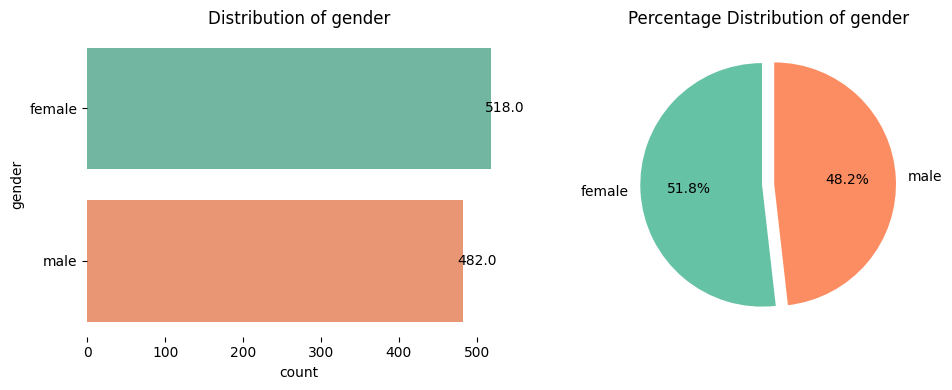

In [18]:
# for the 'gender' column
plot_categorical_distribution('gender')

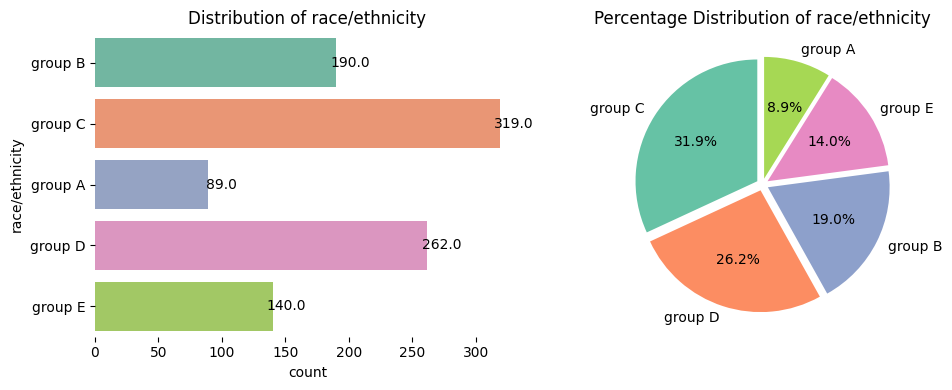

In [19]:
# for the 'race/ethnicity' column
plot_categorical_distribution('race/ethnicity')

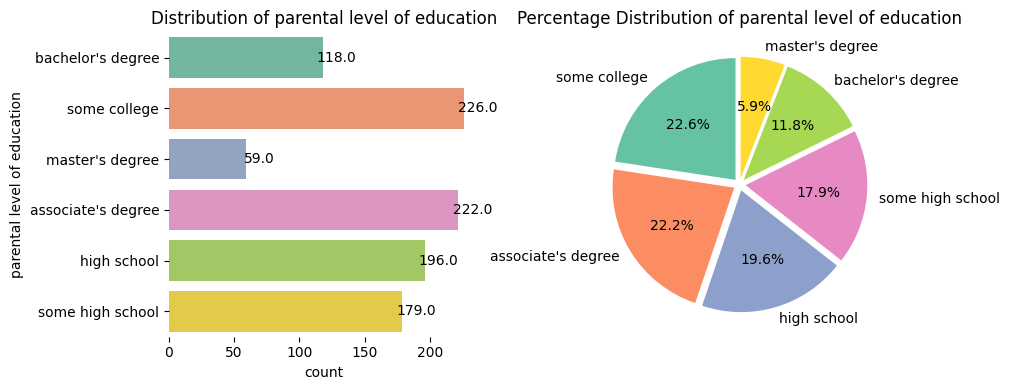

In [20]:
# for the 'parental level of education' column
plot_categorical_distribution('parental level of education')

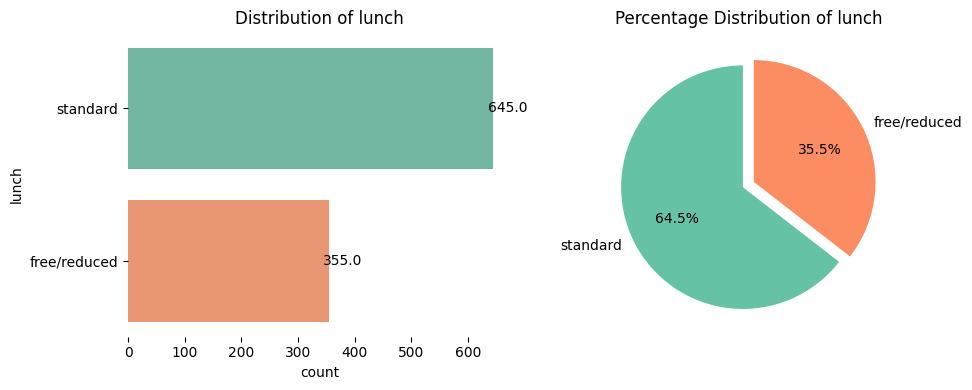

In [21]:
# for the 'lunch' column
plot_categorical_distribution('lunch')

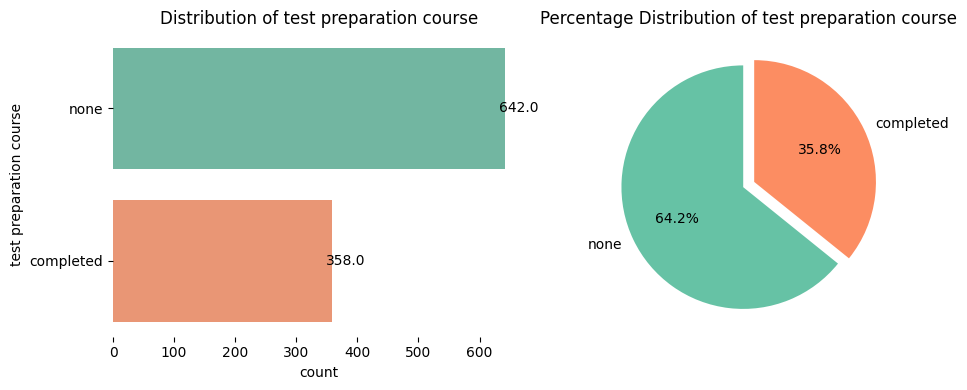

In [22]:
# for the 'test preparation course' column
plot_categorical_distribution('test preparation course')

Insights from the visualizations:

1. **Numerical Columns**:
   - **Math Score**, **Reading Score**, and **Writing Score**: All three show a roughly normal distribution, but there are outliers, as indicated by the boxplots.

2. **Non-Numerical (Categorical) Columns**:
   - **Gender**: The dataset contains both male and female students, with females slightly outnumbering males.
   - **Race/Ethnicity**: There are five groups labeled from A to E, with groups B and C being the most represented.
   - **Parental Level of Education**: There are six distinct categories, with "some college" and "associate's degree" being the most common.
   - **Lunch**: Most students have a standard lunch, with fewer receiving free/reduced lunch.
   - **Test Preparation Course**: The majority of students have not completed a test preparation course.



# Correlation Heatmap:

In [23]:
# Subset the selected columns for numerical columns
subset_numerical_columns = df.select_dtypes(include=['float64', 'int64'])

subset_numerical_columns.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


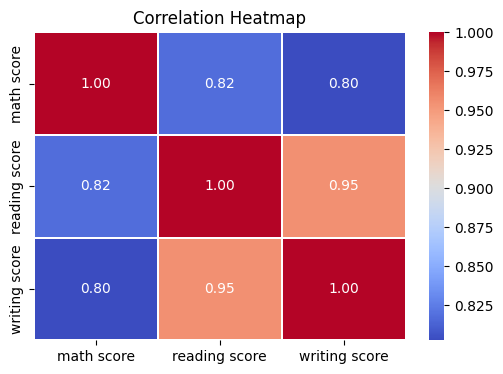

In [24]:
# Create a correlation heatmap for subset
plt.figure(figsize=(6, 4))
sns.heatmap(subset_numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.2)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap displays the relationships between the numerical columns in the dataset:

- **Math score, reading score, and writing score** are all highly correlated with each other. This suggests that students who perform well in one subject tend to perform well in the others as well.
- The strongest correlation is between **reading score and writing score**.

This heatmap helps identify the relationships between variables, especially in understanding how student performance across different subjects is interrelated.



# Calculating Total Score and Average Score:

In [25]:
# Adding columns for total score and average score

# Calculate total score by summing up math, reading, and writing scores
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

# Calculate average score
df['average score'] = df['total score'] / 3

# Display the updated dataframe with new columns
df[['math score', 'reading score', 'writing score', 'total score', 'average score']].head()


,math score,reading score,writing score,total score,average score
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


In [26]:
# Calculate the average scores by gender
average_scores_by_gender = df.groupby('gender').agg(
    avg_reading_score=('reading score', 'mean'),
    avg_writing_score=('writing score', 'mean'),
    avg_math_score=('math score', 'mean'),
    avg_overall_score=('average score', 'mean')
).reset_index()

# Display the table
display(average_scores_by_gender)

,gender,avg_reading_score,avg_writing_score,avg_math_score,avg_overall_score
0,female,72.608108,72.467181,63.633205,69.569498
1,male,65.473029,63.311203,68.728216,65.837483


From the table:
- **Female students** have higher average reading and writing scores.
- **Male students** have a higher average math score.
- Overall, female students have a slightly higher average overall score.


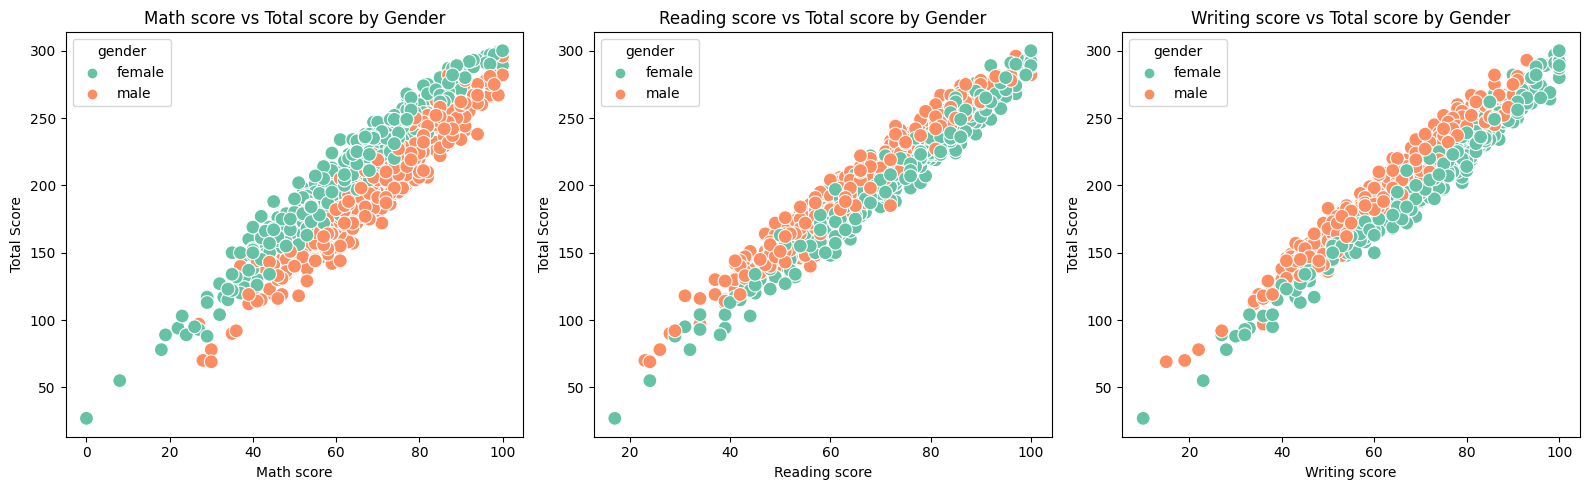

In [27]:
subjects = ['math score', 'reading score', 'writing score']

# Scatter plot for each subject with gender and total score
plt.figure(figsize=(16, 5))

for i, subject in enumerate(subjects, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=subject, y='total score', hue='gender', data=df, palette='Set2', s=100)
    plt.title(f'{subject.capitalize()} vs Total score by Gender')
    plt.xlabel(subject.capitalize())
    plt.ylabel('Total Score')

plt.tight_layout()
plt.show()

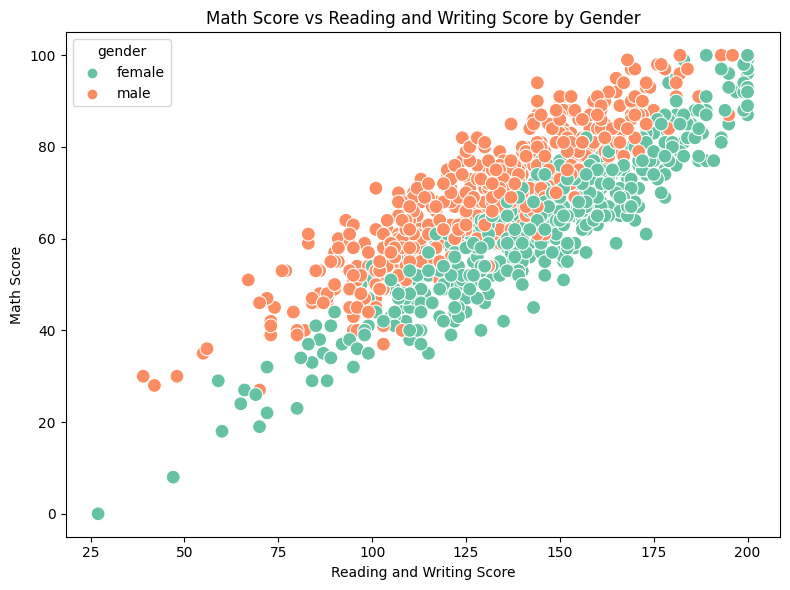

In [28]:
# Create a new column for the sum of reading and writing scores
df['reading_writing_score'] = df['reading score'] + df['writing score']

# Scatter plot for Reading + Writing Score vs Math Score
plt.figure(figsize=(8, 6))
sns.scatterplot(y='math score', x='reading_writing_score', hue='gender', data=df, palette='Set2', s=100)

plt.title('Math Score vs Reading and Writing Score by Gender')
plt.xlabel('Reading and Writing Score')
plt.ylabel('Math Score')
plt.tight_layout()
plt.show()

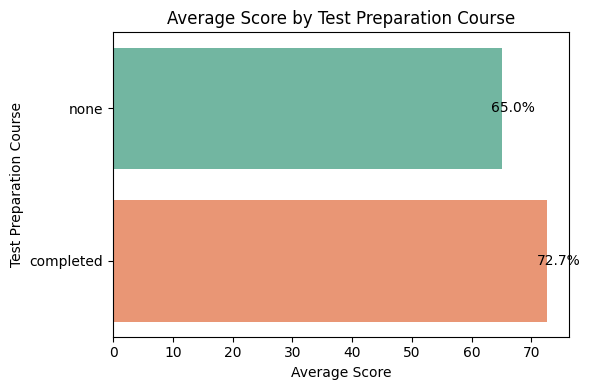

In [29]:
# Update the column values for better readability
plt.figure(figsize=(6, 4))
sns.barplot(y='test preparation course', x='average score', data=df, ci=None, palette='Set2')

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    percentage = f'{(p.get_width() / df["average score"].max()) * 100:.1f}%'
    plt.gca().annotate(percentage, (p.get_width(), p.get_y() + p.get_height() / 2), 
                       ha='center', va='center', xytext=(8, 0), textcoords='offset points')

plt.title('Average Score by Test Preparation Course')
plt.xlabel('Average Score')
plt.ylabel('Test Preparation Course')
plt.tight_layout()
plt.show()


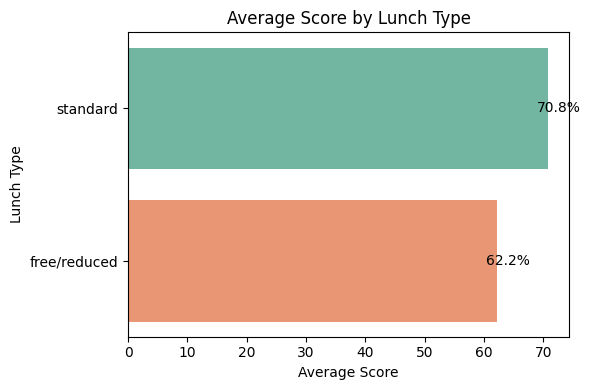

In [30]:
# Bar plot to visualize average score by lunch type
plt.figure(figsize=(6, 4))
sns.barplot(y='lunch', x='average score', data=df, ci=None, palette='Set2')

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    percentage = f'{(p.get_width() / df["average score"].max()) * 100:.1f}%'
    plt.gca().annotate(percentage, (p.get_width(), p.get_y() + p.get_height() / 2), 
                       ha='center', va='center', xytext=(8, 0), textcoords='offset points')

plt.title('Average Score by Lunch Type')
plt.xlabel('Average Score')
plt.ylabel('Lunch Type')
plt.tight_layout()
plt.show()

Key findings:

1. **Average Scores by Gender**: Female students tend to have higher average reading and writing scores, while male students have higher average math scores. Overall, female students slightly outperform males in terms of overall average scores.

2. **Scatter Plots**: Visualized the relationship between the individual subject scores (math, reading, writing) and the total score, differentiated by gender. This helps illustrate how each subject contributes to the total score.

3. **Math vs. Reading + Writing Score**: A scatter plot showed the relationship between students' combined reading and writing scores and their math scores, broken down by gender.

4. **Bar Charts**:
   - **Average Score by Test Preparation Course**: Students who completed the test preparation course tend to have slightly higher average scores than those who did not.
   - **Average Score by Lunch Type**: Students with standard lunch have higher average scores compared to those with free/reduced lunch.


# Grading System:

In [31]:
# Function to assign grade based on average score
def assign_grade(avg_score):
    if avg_score >= 90:
        return 'A'
    elif avg_score >= 80:
        return 'B'
    elif avg_score >= 70:
        return 'C'
    elif avg_score >= 60:
        return 'D'
    else:
        return 'F'

# Apply the grading function to the 'average score' column
df['grade'] = df['average score'].apply(assign_grade)

# Display the updated DataFrame with the new 'grade' column
print(df[['math score', 'reading score', 'writing score', 'average score', 'grade']].head())


   math score  reading score  writing score  average score grade
0          72             72             74      72.666667     C
1          69             90             88      82.333333     B
2          90             95             93      92.666667     A
3          47             57             44      49.333333     F
4          76             78             75      76.333333     C


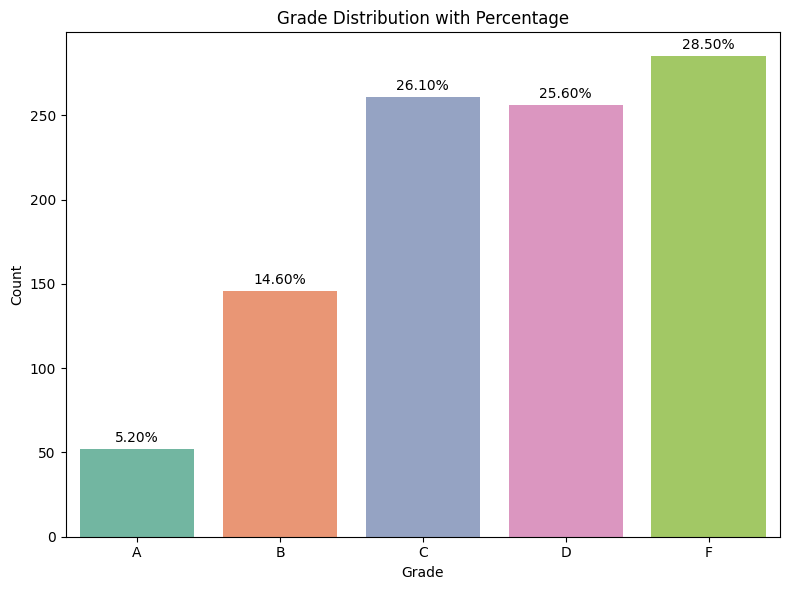

In [32]:
# Bar chart to visualize the grade distribution with percentage labels
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', data=df, palette='Set2', order=['A', 'B', 'C', 'D', 'F'])

# Calculate total number of students for percentage calculation
total_students = len(df)

# Add percentage labels on top of bars
ax = plt.gca()
for p in ax.patches:
    percentage = f'{(p.get_height() / total_students) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.title('Grade Distribution with Percentage')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


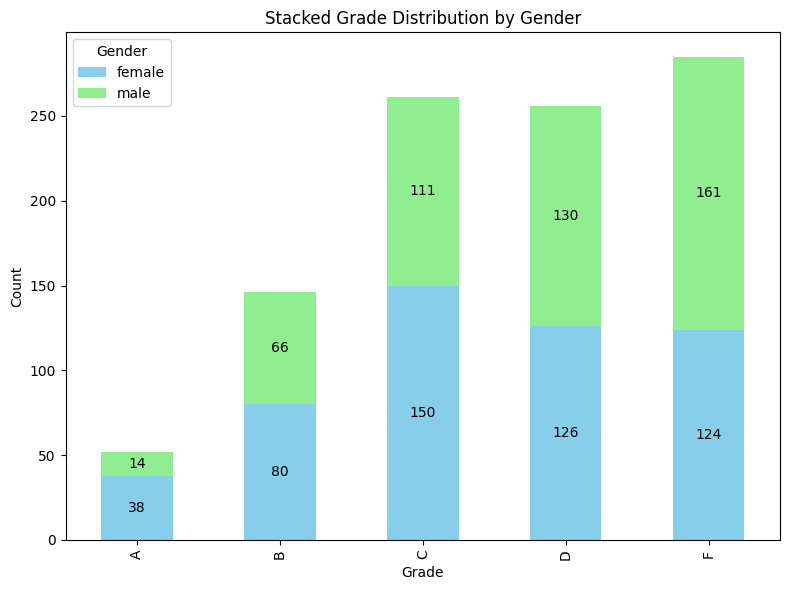

In [33]:
# Create a cross-tabulation of gender and grade
grade_gender_dist = pd.crosstab(df['grade'], df['gender'])

# Plot the stacked bar chart
ax = grade_gender_dist.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightgreen'])

# Add count labels on each stacked bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # Avoid labels for zero heights
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')

plt.title('Stacked Grade Distribution by Gender')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

The grading system based on students' average scores:

- **Grades**:
  - A: Average score >= 90
  - B: Average score >= 80
  - C: Average score >= 70
  - D: Average score >= 60
  - F: Average score < 60

The updated dataset shows the calculated grades for each student. Additionally:

1. **Grade Distribution**: A bar chart visualized the distribution of grades with percentage labels. Most students fall in the B and C grade categories.
2. **Stacked Bar Chart**: A cross-tabulated chart showed the grade distribution by gender. This helps to observe the comparison between male and female students' grades across different categories.

# Exam Status:

In [34]:
# Function to assign exam status based on the grade
def assign_exam_status(grade):
    if grade in ['A', 'B', 'C', 'D']:
        return 'Pass'
    else:
        return 'Fail'

# Apply the function to create the 'exam_status' column
df['exam_status'] = df['grade'].apply(assign_exam_status)

# Display the updated DataFrame with the new 'exam_status' column
print(df[['math score', 'reading score', 'writing score', 'average score', 'grade', 'exam_status']].head())


   math score  reading score  writing score  average score grade exam_status
0          72             72             74      72.666667     C        Pass
1          69             90             88      82.333333     B        Pass
2          90             95             93      92.666667     A        Pass
3          47             57             44      49.333333     F        Fail
4          76             78             75      76.333333     C        Pass


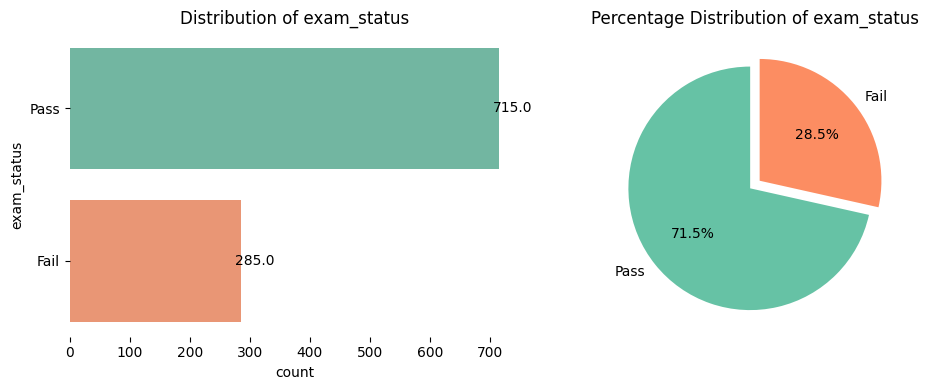

In [35]:
# for the 'gender' column
plot_categorical_distribution('exam_status')

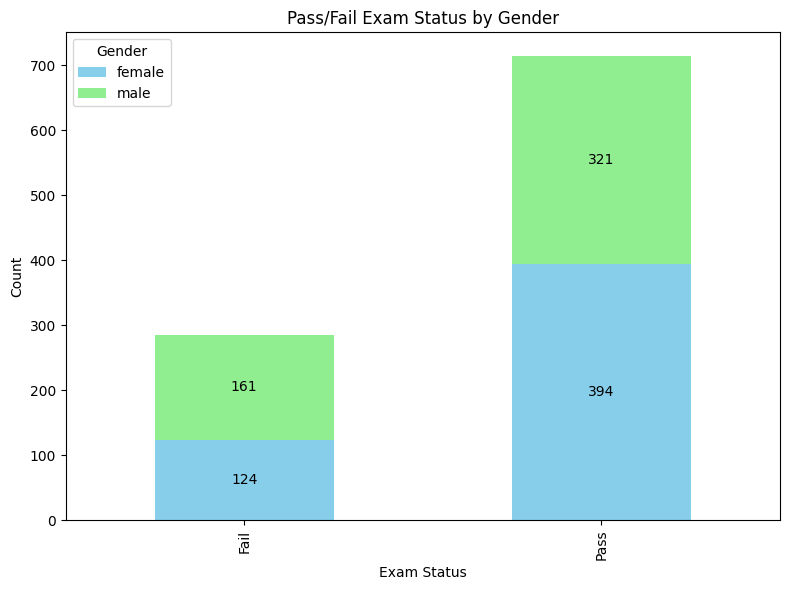

In [36]:
# Create a cross-tabulation of exam status and gender
exam_status_gender_dist = pd.crosstab(df['exam_status'], df['gender'])

# Plot the stacked bar chart
ax = exam_status_gender_dist.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightgreen'])

# Add count labels on each stacked bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # Avoid labels for zero heights
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')

plt.title('Pass/Fail Exam Status by Gender')
plt.xlabel('Exam Status')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

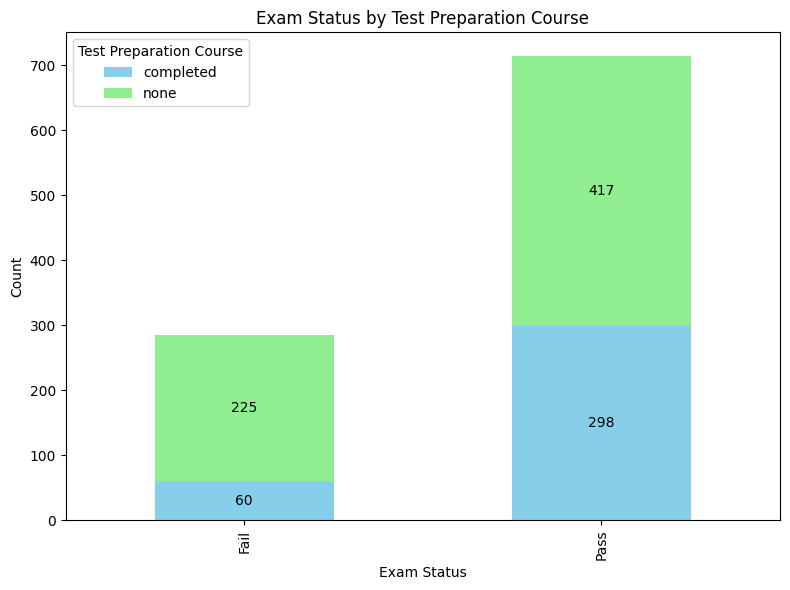

In [37]:
# Create a cross-tabulation of exam status and test preparation course
exam_status_prep_dist = pd.crosstab(df['exam_status'], df['test preparation course'])

# Plot the stacked bar chart
ax = exam_status_prep_dist.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightgreen'])

# Add count labels on each stacked bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # Avoid labels for zero heights
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')

plt.title('Exam Status by Test Preparation Course')
plt.xlabel('Exam Status')
plt.ylabel('Count')
plt.legend(title='Test Preparation Course')
plt.tight_layout()
plt.show()

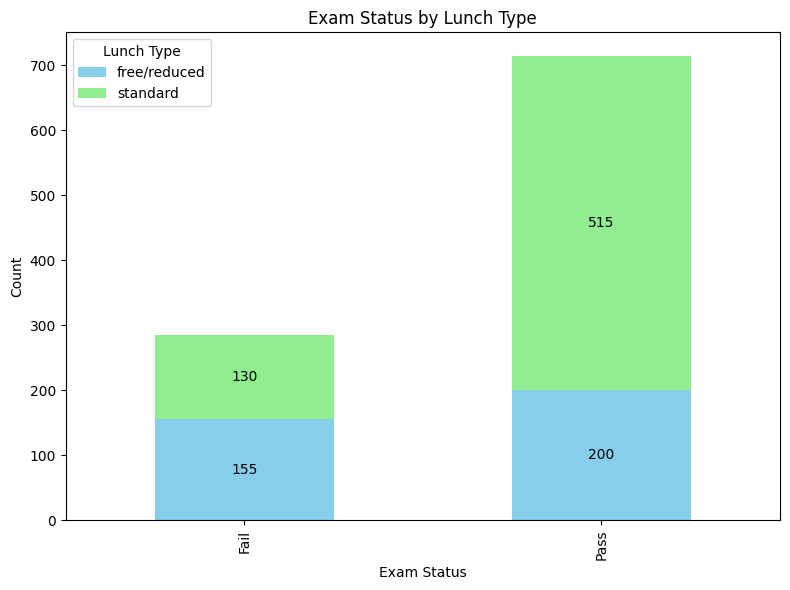

In [38]:
# Create a cross-tabulation of exam status and lunch type
exam_status_lunch_dist = pd.crosstab(df['exam_status'], df['lunch'])

# Plot the stacked bar chart
ax = exam_status_lunch_dist.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightgreen'])

# Add count labels on each stacked bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # Avoid labels for zero heights
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')

plt.title('Exam Status by Lunch Type')
plt.xlabel('Exam Status')
plt.ylabel('Count')
plt.legend(title='Lunch Type')
plt.tight_layout()
plt.show()

The results for the **Exam Status** based on the grading system:

1. **Pass/Fail Classification**: Students with grades A, B, C, or D are marked as "Pass," while those with an F are marked as "Fail." The updated dataset reflects this in the new "exam_status" column.
   
2. **Exam Status Distribution**:
   - A bar chart visualizes the overall distribution of students who passed and failed.
   
3. **Pass/Fail by Gender**: A stacked bar chart shows the distribution of pass/fail status between male and female students. This helps in understanding how gender correlates with exam performance.
   
4. **Pass/Fail by Test Preparation Course**: Students who completed the test preparation course are shown to have a higher passing rate compared to those who did not.
   
5. **Pass/Fail by Lunch Type**: Students with standard lunch tend to have higher passing rates compared to those with free/reduced lunch.

These insights provide a detailed view of the factors affecting student performance.

In [39]:
# Save the DataFrame as a CSV file
df.to_csv('StudentsPerformance_with_analysis.csv', index=False)

print("DataFrame saved as 'StudentsPerformance_with_analysis.csv'")

DataFrame saved as 'StudentsPerformance_with_analysis.csv'
